In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [3]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [4]:
def initialize_centroids(data, k):
    # Initialize centroids randomly from the data points
    centroids = data.copy()
    np.random.shuffle(centroids)
    return centroids[:k]
    

In [5]:
def compute_distances(data, centroids):
    # Compute distance between each data point and the set of centroids
    distances = np.zeros((data.shape[0], centroids.shape[0]))
    for i, c in enumerate(centroids):
        distances[:, i] = np.linalg.norm(data - c, axis=1)
    return distances
    

In [6]:
def assign_clusters(distances):
    # Assign the closest cluster to each data point
    return np.argmin(distances, axis=1)

#. Returns the indices of the minimum values along an axis.

In [7]:
def update_centroids(data, clusters, k):
    # Compute the new centroids as the mean of the data points
    # assigned to each cluster
    centroids = np.zeros((k, data.shape[1]))
    for i in range(k):
        centroids[i, :] = np.mean(data[clusters == i, :], axis=0)
    return centroids



In [8]:
def k_means(data, k, max_iterations=100):
    centroids = initialize_centroids(data, k)
    for iter in range(max_iterations):
        distances = compute_distances(data, centroids)
        clusters = assign_clusters(distances)
        centroids = update_centroids(data, clusters, k)
    return centroids, clusters


In [9]:
# Choose the number of clusters, K
k = 4
# Run the K-means algorithm
centroids, clusters = k_means(data_scaled, k)
# Compute the total within-cluster sum of squares
wcss = np.sum([np.sum(np.square(data_scaled[clusters == i] -
centroids[i])) for i in range(k)])
print("Total within-cluster sum of squares: ", wcss)

Total within-cluster sum of squares:  17.46619760906058


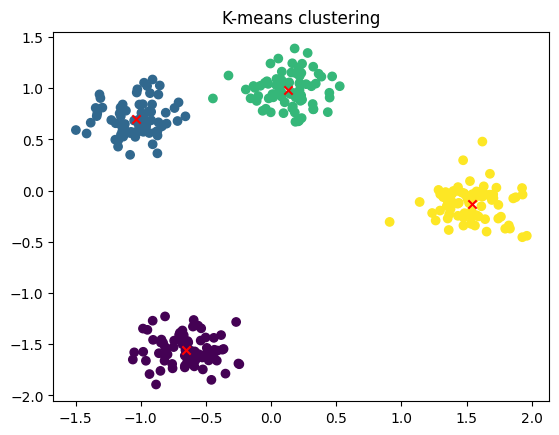

In [10]:
#visualize
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=clusters)
plt.scatter(centroids[:, 0], centroids[:, 1], c='r', marker='x')
plt.title('K-means clustering')
plt.show()
    

In [24]:
# Generate a synthetic dataset with 300 samples and 2 features
data = make_blobs(n_samples=300, centers=4, n_features=2, random_state=42)
# Standardize the dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[0])

In [25]:
def initialize_medoids(data, k):
    """Randomly initialize k medoids.
    
    Args:
        data (np.array): Dataset.
        k (int): Number of clusters.
    
    Returns:
        (np.array): k medoids, each row is a medoid.
    """
    # Randomly choose k data points as medoids.
    medoids = data[np.random.choice(data.shape[0], k, replace=False)]
    return medoids


In [26]:
# manhattan distance
def manhattan_distance(x, y):
    """Compute the Manhattan distance between two points.
    
    Args:
        x (np.array): First point.
        y (np.array): Second point.
    
    Returns:
        (float): Manhattan distance between x and y.
    """
    distance = np.sum(np.abs(x - y))
    return distance

In [27]:
#assigning the data points to the closest medoid
def assign_labels(data, medoids):
    # Initialize an empty array for labels.
    labels = np.zeros(data.shape[0])
    # Compute the distance from each point to each medoid.
    for i in range(data.shape[0]):
        distances = np.zeros(medoids.shape[0])
        for j in range(medoids.shape[0]):
            distances[j] = manhattan_distance(data[i], medoids[j])
        labels[i] = np.argmin(distances)
    return labels

In [28]:
#updating the medoids
def update_medoids(data, medoids, labels):
    new_medoids = np.zeros(medoids.shape)
    # Update each medoid.
    for i in range(medoids.shape[0]):
        # Select data points assigned to the medoid i.
        datapoints = data[labels == i]
        # Compute the distances from each data point to all other data points.
        distances = np.zeros(datapoints.shape[0])
        for j in range(datapoints.shape[0]):
            distances[j] = np.sum(np.abs(datapoints[j] - datapoints))
        # Select the data point with the smallest sum of distances.
        new_medoids[i] = datapoints[np.argmin(distances)]
    return new_medoids

In [29]:
def k_medoids(data, k, max_iterations=100):
    """Cluster data into k clusters using the k-medoids algorithm.
    
    Args:
        data (np.array): Dataset.
        k (int): Number of clusters.
        max_iterations (int): Maximum number of iterations.
    
    Returns:
        (np.array): Final medoids.
        (np.array): Final labels.
    """
    # Initialize medoids.
    medoids = initialize_medoids(data, k)
    # Update medoids iteratively.
    for i in range(max_iterations):
        print(f"Iteration: {i}")
        # Assign labels based on medoids.
        labels = assign_labels(data, medoids)
        # Update medoids based on labels.
        new_medoids = update_medoids(data, medoids, labels)
        # Check for convergence.
        if np.array_equal(medoids, new_medoids):
            break
        else:
            medoids = new_medoids
    return medoids, labels


In [31]:
# Run k-medoids algorithm on the dataset.
medoids, labels = k_medoids(data_scaled, 4)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


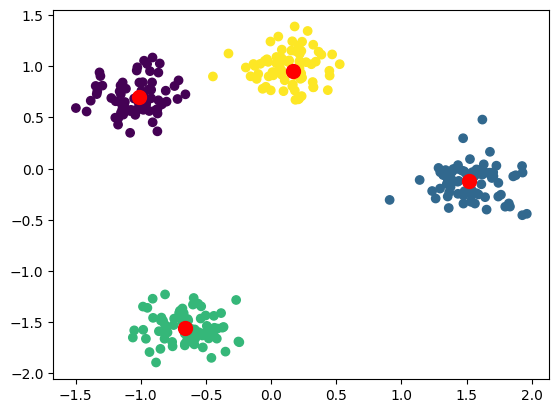

In [32]:
# Plot dataset with colors based on the clustering.
plt.scatter(data_scaled[:, 0], data_scaled[:, 1], c=labels)
plt.scatter(medoids[:, 0], medoids[:, 1], c="r", s=100)
plt.show()